In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from pybaseball import batting_stats, statcast
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing

In [2]:
from datetime import datetime

In [3]:
data_path = 'batting.csv'
statcast_path = 'statcast-april.csv'

In [4]:
if Path(data_path).exists():
  df = pd.read_csv(data_path)
else:
  df = batting_stats(2000, 2022, qual=200)
  df_23 = batting_stats(2023, qual=30)
  df = pd.concat([df, df_23], axis=0)
  df.to_csv(data_path)

In [5]:
df.head()

,Unnamed: 0,IDfg,Season,Name,Team,Age,G,AB,PA,H,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,...,NaN,NaN,NaN,0,0.127,0.191,NaN,NaN,NaN,12.7
1,2,1109,2001,Barry Bonds,SFG,36,153,476,664,156,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,12.5
2,1,1109,2004,Barry Bonds,SFG,39,147,373,617,135,...,NaN,NaN,NaN,0,0.124,0.164,NaN,NaN,NaN,11.9
3,17,15640,2022,Aaron Judge,NYY,30,157,570,696,177,...,118.4,246.0,0.609,404,0.169,0.287,NaN,NaN,NaN,11.2
4,28,13611,2018,Mookie Betts,BOS,25,136,520,614,180,...,110.6,217.0,0.500,434,0.220,0.270,NaN,NaN,NaN,10.4


In [6]:
if Path(statcast_path).exists():
    realtime_stats = pd.read_csv(statcast_path)
else:
    realtime_stats = statcast(start_dt='2023-03-30', end_dt=datetime.today().strftime('%Y-%m-%d'))
    realtime_stats.to_csv(statcast_path)

In [7]:
realtime_stats.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,2539,FF,2023-04-18,99.8,-1.35,5.73,"López, Reynaldo",607208,625643,strikeout,...,3,0,3,0,3,Standard,Standard,213.0,0.004,-0.150
1,2668,SL,2023-04-18,89.2,-1.47,5.57,"López, Reynaldo",607208,625643,NaN,...,3,0,3,0,3,Standard,Standard,147.0,0.000,0.058
2,2723,FF,2023-04-18,98.2,-1.29,5.80,"López, Reynaldo",607208,625643,NaN,...,3,0,3,0,3,Standard,Standard,212.0,0.000,0.022
3,2741,FF,2023-04-18,98.5,-1.38,5.74,"López, Reynaldo",607208,625643,NaN,...,3,0,3,0,3,Standard,Standard,208.0,0.000,-0.026
4,2824,FF,2023-04-18,99.1,-1.49,5.73,"López, Reynaldo",607208,625643,NaN,...,3,0,3,0,3,Standard,Standard,214.0,0.000,-0.027


In [8]:
realtime_stats.shape

(78713, 93)

In [9]:
realtime_stats.columns

Index(['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',


In [10]:
realtime_stats.loc[realtime_stats['player_name'] == 'Kershaw, Clayton']

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
4839,2,SL,2023-04-18,86.7,1.38,6.14,"Kershaw, Clayton",502054,477132,strikeout,...,3,0,3,0,3,Standard,Standard,235.0,0.044,-0.537
4840,4,CU,2023-04-18,76.0,1.02,6.28,"Kershaw, Clayton",502054,477132,NaN,...,3,0,3,0,3,Strategic,Standard,341.0,0.000,0.244
4841,6,FF,2023-04-18,92.0,1.41,6.13,"Kershaw, Clayton",502054,477132,NaN,...,3,0,3,0,3,Strategic,Standard,174.0,0.000,-0.177
4842,10,SL,2023-04-18,85.5,1.49,6.17,"Kershaw, Clayton",502054,477132,NaN,...,3,0,3,0,3,Strategic,Standard,253.0,0.000,-0.103
4843,14,SL,2023-04-18,87.8,1.51,6.08,"Kershaw, Clayton",502054,477132,NaN,...,3,0,3,0,3,Standard,Standard,204.0,0.000,0.071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72511,3892,FF,2023-04-01,92.3,1.44,6.26,"Kershaw, Clayton",606466,477132,NaN,...,0,0,0,0,0,Standard,Standard,167.0,0.000,0.034
72512,4058,CU,2023-04-01,74.2,1.10,6.44,"Kershaw, Clayton",641786,477132,strikeout,...,0,0,0,0,0,Standard,Standard,350.0,0.022,-0.173
72513,4187,SL,2023-04-01,86.9,1.48,6.24,"Kershaw, Clayton",641786,477132,NaN,...,0,0,0,0,0,Standard,Standard,209.0,0.000,0.029
72514,4297,CU,2023-04-01,73.4,1.28,6.40,"Kershaw, Clayton",641786,477132,NaN,...,0,0,0,0,0,Standard,Standard,344.0,0.000,-0.057


In [11]:
kersh = realtime_stats.loc[realtime_stats['player_name'] == 'Kershaw, Clayton'].copy()

In [12]:
kersh['pitch_type'] = kersh['pitch_type'].astype('category')

In [13]:
kersh

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
4839,2,SL,2023-04-18,86.7,1.38,6.14,"Kershaw, Clayton",502054,477132,strikeout,...,3,0,3,0,3,Standard,Standard,235.0,0.044,-0.537
4840,4,CU,2023-04-18,76.0,1.02,6.28,"Kershaw, Clayton",502054,477132,NaN,...,3,0,3,0,3,Strategic,Standard,341.0,0.000,0.244
4841,6,FF,2023-04-18,92.0,1.41,6.13,"Kershaw, Clayton",502054,477132,NaN,...,3,0,3,0,3,Strategic,Standard,174.0,0.000,-0.177
4842,10,SL,2023-04-18,85.5,1.49,6.17,"Kershaw, Clayton",502054,477132,NaN,...,3,0,3,0,3,Strategic,Standard,253.0,0.000,-0.103
4843,14,SL,2023-04-18,87.8,1.51,6.08,"Kershaw, Clayton",502054,477132,NaN,...,3,0,3,0,3,Standard,Standard,204.0,0.000,0.071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72511,3892,FF,2023-04-01,92.3,1.44,6.26,"Kershaw, Clayton",606466,477132,NaN,...,0,0,0,0,0,Standard,Standard,167.0,0.000,0.034
72512,4058,CU,2023-04-01,74.2,1.10,6.44,"Kershaw, Clayton",641786,477132,strikeout,...,0,0,0,0,0,Standard,Standard,350.0,0.022,-0.173
72513,4187,SL,2023-04-01,86.9,1.48,6.24,"Kershaw, Clayton",641786,477132,NaN,...,0,0,0,0,0,Standard,Standard,209.0,0.000,0.029
72514,4297,CU,2023-04-01,73.4,1.28,6.40,"Kershaw, Clayton",641786,477132,NaN,...,0,0,0,0,0,Standard,Standard,344.0,0.000,-0.057


In [14]:
kersh['zone'].unique()

array([14., 13.,  3.,  4., 12.,  7.,  1.,  9.,  8.,  2.,  5.,  6., 11.])

In [15]:
kersh[['plate_x', 'plate_z']]

,plate_x,plate_z
4839,0.23,1.28
4840,-0.69,0.67
4841,0.37,3.34
4842,-0.40,2.86
4843,-0.21,-0.04
...,...,...
72511,-0.45,3.59
72512,0.33,1.52
72513,-0.33,-0.17
72514,0.83,2.77


In [16]:
kersh[['plate_z', 'plate_x']]

,plate_z,plate_x
4839,1.28,0.23
4840,0.67,-0.69
4841,3.34,0.37
4842,2.86,-0.40
4843,-0.04,-0.21
...,...,...
72511,3.59,-0.45
72512,1.52,0.33
72513,-0.17,-0.33
72514,2.77,0.83


In [17]:
strikes = kersh['zone'].loc[kersh['zone'].isin(list(range(1, 10)))]

In [18]:
zone = strikes.value_counts()

In [19]:
zone = zone.sort_index()

In [20]:
zone

zone
1.0    13
2.0    25
3.0    11
4.0    24
5.0    24
6.0    22
7.0    32
8.0    36
9.0    16
Name: count, dtype: int64

In [21]:
heat = np.array(zone).reshape(3,3)

In [22]:
heat

array([[13, 25, 11],
       [24, 24, 22],
       [32, 36, 16]])

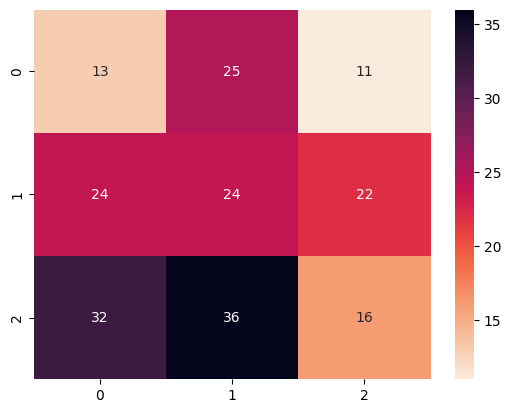

In [23]:
ax_heat = sns.heatmap(heat, annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

In [24]:
kersh_scatter_strikes = kersh.loc[kersh['zone'].isin(list(range(1, 10)))]

In [25]:
kersh_scatter_strikes['plate_x'].max()/3

0.27666666666666667

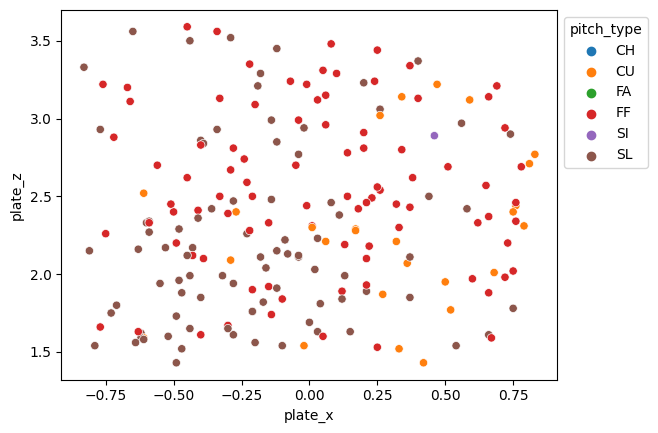

In [26]:
ax_scatter = sns.scatterplot(data=kersh_scatter_strikes, x ='plate_x', y='plate_z', hue='pitch_type')
sns.move_legend(ax_scatter, "upper left", bbox_to_anchor=(1, 1))

In [27]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,3))

In [28]:
kersh_scatter_strikes.loc[:,'plate_x'] = scaler.fit_transform(kersh_scatter_strikes[['plate_x']])

In [29]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,3))

In [30]:
kersh_scatter_strikes.loc[:,'plate_z'] = scaler.fit_transform(kersh_scatter_strikes[['plate_z']] * -1)

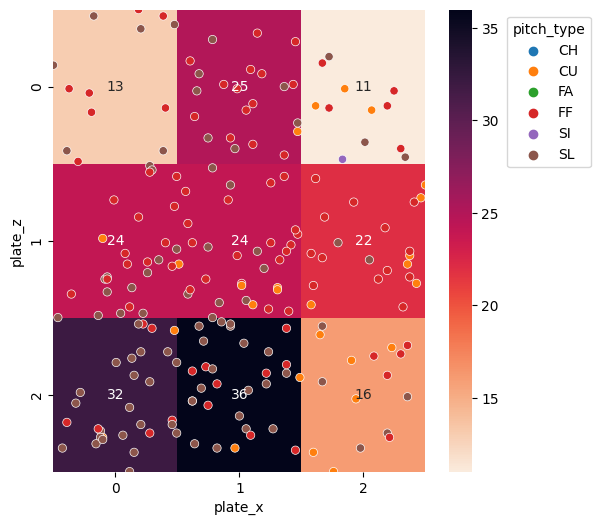

In [31]:
plt.figure(figsize=(6,6))

ax_heat = sns.heatmap(heat, annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))
ax_scatter = sns.scatterplot(ax=ax_heat, data=kersh_scatter_strikes, x='plate_x', y='plate_z', hue='pitch_type')
sns.move_legend(ax_scatter, "upper left", bbox_to_anchor=(1.2, 1))

In [32]:
kersh[['release_pos_x', 'release_pos_y', 'release_pos_z', 'pitch_type']]

,release_pos_x,release_pos_y,release_pos_z,pitch_type
4839,1.38,54.28,6.14,SL
4840,1.02,54.05,6.28,CU
4841,1.41,54.05,6.13,FF
4842,1.49,54.20,6.17,SL
4843,1.51,54.04,6.08,SL
...,...,...,...,...
72511,1.44,54.07,6.26,FF
72512,1.10,54.06,6.44,CU
72513,1.48,54.14,6.24,SL
72514,1.28,54.19,6.40,CU


In [33]:
from mpl_toolkits import mplot3d

In [34]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [35]:
release_pos = kersh[['release_pos_x', 'release_pos_y', 'release_pos_z', 'pitch_type']].copy()

In [36]:
kersh['pitch_type'].unique()

['SL', 'CU', 'FF', 'CH', 'SI', 'FA']
Categories (6, object): ['CH', 'CU', 'FA', 'FF', 'SI', 'SL']

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
colors={'SL': 'red', 'CU': 'blue', 'FF': 'purple', 'CH': 'green', 'SI': 'yellow', 'FA': 'pink'}

In [39]:
release_pos = pd.DataFrame(MinMaxScaler().fit_transform(np.array(release_pos[['release_pos_x', 'release_pos_y', 'release_pos_z']])), columns=['release_pos_x', 'release_pos_y', 'release_pos_z'])

In [40]:
pt = pd.DataFrame(kersh[['pitch_type']])

In [41]:
pt = pt.reset_index(drop=True)

In [42]:
release_pos = release_pos.reset_index(drop=True)

In [43]:
release_pos = pd.concat([release_pos, pt], axis=1)

In [44]:
release_pos

,release_pos_x,release_pos_y,release_pos_z,pitch_type
0,0.317365,0.181122,0.116592,SL
1,0.101796,0.122449,0.179372,CU
2,0.335329,0.122449,0.112108,FF
3,0.383234,0.160714,0.130045,SL
4,0.395210,0.119898,0.089686,SL
...,...,...,...,...
367,0.353293,0.127551,0.170404,FF
368,0.149701,0.125000,0.251121,CU
369,0.377246,0.145408,0.161435,SL
370,0.257485,0.158163,0.233184,CU


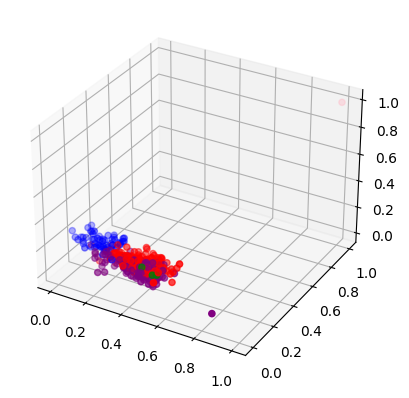

In [45]:
ax = plt.axes(projection='3d')
ax.scatter3D(release_pos['release_pos_x'], release_pos['release_pos_y'], release_pos['release_pos_z'], c=release_pos['pitch_type'].map(colors))

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(len(release_pos['pitch_type'].astype(str).unique()))

In [48]:
release_pos_only = release_pos.drop(columns='pitch_type')

In [49]:
preds = kmeans.fit_predict(release_pos_only)

/home/brandon/.pyenv/versions/3.11.3/envs/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
preds

array([3, 4, 3, 5, 5, 5, 5, 5, 5, 0, 1, 5, 3, 5, 3, 5, 3, 1, 0, 1, 3, 4,
       3, 1, 0, 5, 5, 5, 1, 0, 1, 5, 1, 1, 5, 5, 1, 5, 1, 5, 1, 1, 4, 1,
       4, 1, 5, 5, 0, 3, 1, 1, 1, 3, 0, 0, 5, 0, 5, 5, 5, 1, 3, 5, 0, 5,
       5, 1, 5, 1, 1, 1, 4, 5, 0, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 0, 0, 4,
       3, 4, 0, 4, 0, 4, 3, 4, 3, 3, 3, 4, 3, 1, 1, 1, 1, 5, 5, 3, 1, 5,
       3, 3, 0, 3, 5, 0, 3, 0, 3, 3, 5, 1, 4, 3, 3, 5, 0, 4, 0, 4, 3, 3,
       3, 5, 1, 3, 3, 4, 3, 1, 3, 3, 3, 1, 5, 5, 5, 5, 3, 0, 3, 3, 5, 3,
       3, 3, 3, 5, 3, 4, 5, 3, 4, 3, 3, 3, 0, 0, 0, 4, 0, 4, 3, 0, 0, 4,
       4, 3, 1, 1, 1, 1, 0, 4, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 0, 3, 0, 3, 0, 5, 5, 5, 0, 5, 5, 0, 1, 1, 1, 5, 1, 5, 5, 1, 5,
       5, 0, 4, 5, 5, 5, 3, 5, 4, 5, 1, 0, 5, 5, 5, 4, 3, 4, 5, 3, 3, 3,
       0, 5, 2, 3, 3, 5, 0, 3, 0, 0, 3, 5, 5, 1, 5, 1, 3, 0, 3, 0, 0, 0,
       1, 5, 5, 5, 5, 5, 0, 5, 3, 5, 5, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 1, 1, 1, 1, 1, 4, 5,

In [51]:
pitch = release_pos['pitch_type'].cat.codes

In [52]:
pitch

0      5
1      1
2      3
3      5
4      5
      ..
367    3
368    1
369    5
370    1
371    3
Length: 372, dtype: int8

In [53]:
color_codes={0: 'red', 1: 'blue', 2: 'purple', 3: 'green', 4: 'yellow', 5: 'pink'}

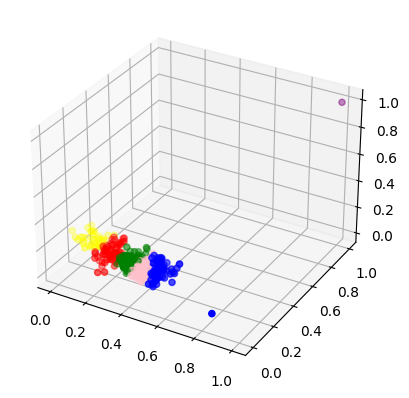

In [54]:
ax = plt.axes(projection='3d')
ax.scatter3D(release_pos['release_pos_x'], release_pos['release_pos_y'], release_pos['release_pos_z'], c=pd.Series(preds).map(color_codes))

In [55]:
from sklearn_extra.cluster import KMedoids

In [56]:
kmed = KMedoids(len(release_pos['pitch_type'].astype(str).unique()))

In [57]:
preds_med = kmed.fit_predict(release_pos_only)

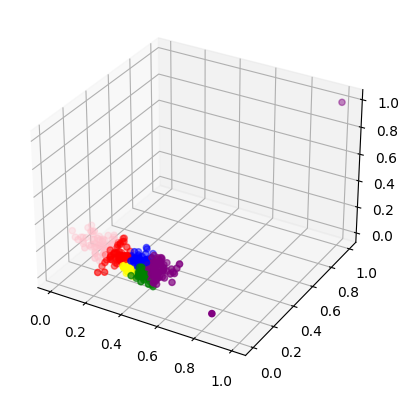

In [58]:
ax = plt.axes(projection='3d')
ax.scatter3D(release_pos['release_pos_x'], release_pos['release_pos_y'], release_pos['release_pos_z'], c=pd.Series(preds_med).map(color_codes))

In [59]:
release_pos_no_outliers = release_pos.loc[(release_pos['release_pos_x'] < 0.6) & (release_pos['release_pos_y'] < 0.8) & (release_pos['release_pos_z'] < 0.8)]

In [60]:
release_pos_no_outliers_only = release_pos_no_outliers.drop(columns='pitch_type')

In [61]:
preds_med = kmed.fit_predict(release_pos_no_outliers_only)

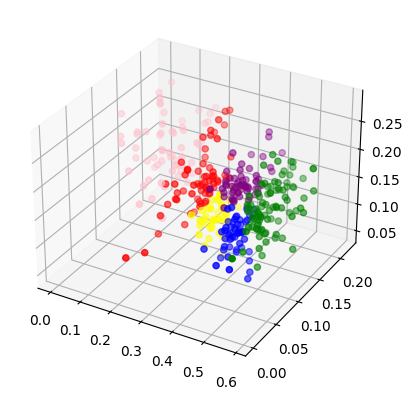

In [62]:
ax = plt.axes(projection='3d')
ax.scatter3D(release_pos_no_outliers_only['release_pos_x'], release_pos_no_outliers_only['release_pos_y'], release_pos_no_outliers_only['release_pos_z'], c=pd.Series(preds_med).map(color_codes))

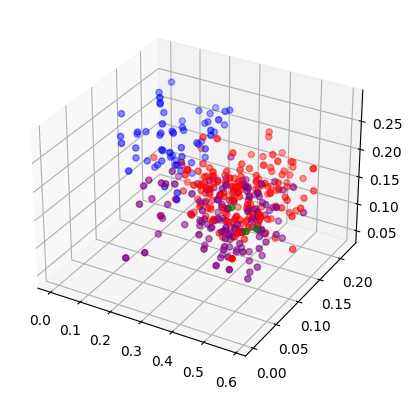

In [63]:
ax = plt.axes(projection='3d')
ax.scatter3D(release_pos_no_outliers['release_pos_x'], release_pos_no_outliers['release_pos_y'], release_pos_no_outliers['release_pos_z'], c=release_pos_no_outliers['pitch_type'].map(colors))

In [64]:
input_size, hidden_size, num_layers = 0, 0, 0

In [65]:
import tensorflow as tf

2023-05-05 17:07:14.112382: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 17:07:14.138406: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 17:07:14.138994: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 17:07:14.711329: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [66]:
inputs = tf.random.normal([32, 10, 8])

2023-05-05 17:07:15.366452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-05 17:07:15.366755: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [67]:
num_pitches = len(pitch.unique())

In [68]:
lstm = tf.keras.layers.LSTM(num_pitches)

In [69]:
num_pitches

6

In [70]:
inputs

<tf.Tensor: shape=(32, 10, 8), dtype=float32, numpy=
array([[[-1.2945082 , -0.03030543,  0.4205304 , ...,  0.08174142,
         -1.737498  , -1.0434265 ],
        [ 1.1089422 , -0.24071863,  1.2627821 , ...,  0.26375166,
         -2.029031  ,  0.7620836 ],
        [ 0.01993206,  0.9645207 , -0.2873854 , ...,  3.1808438 ,
         -2.2056024 , -1.461554  ],
        ...,
        [ 0.7843938 , -0.11961149, -1.1038735 , ..., -0.22676502,
         -0.2889217 , -1.8839182 ],
        [-1.1959565 ,  0.07730573, -0.4983612 , ..., -0.66935587,
          1.2384328 , -1.9425176 ],
        [-1.7664158 , -0.9769876 , -0.4161452 , ..., -0.633728  ,
         -0.57137513,  0.52026886]],

       [[-0.6523306 ,  0.9596201 ,  0.5631422 , ...,  0.6680241 ,
         -0.49923587, -0.81787544],
        [ 0.20117494, -0.9138565 ,  0.69028294, ..., -0.10946243,
          0.5152207 ,  1.2670991 ],
        [ 1.1556203 ,  1.904351  , -2.2896516 , ...,  0.408047  ,
         -1.1647506 ,  1.028515  ],
        ...,
 

In [71]:
output = lstm(inputs)

Identify pitch sequences
* (Naive) Track order of pitches for an at-bat based on count
* Utilize batter-pitcher matchup sequencing
* [Optional] Include pitch location

In [72]:
# model = keras.models.Sequential()
# model.add(keras.layers.LSTM(cfg.LSTM, input_shape=(cfg.TIMESTEPS,
#                   cfg.FEATURES),
#                   return_sequences=True))
# model.add(SeqSelfAttention(attention_width=cfg.ATTNWIDTH,
#                 attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
#                 attention_activation='softmax',
#                 name='Attention'))
# model.add(keras.layers.Dense(cfg.DENSE))
# model.add(keras.layers.Dense(cfg.OUTPUT, activation='sigmoid'))
#
# https://stackoverflow.com/questions/58966874/adding-attention-on-top-of-simple-lstm-layer-in-tensorflow-2-0

In [73]:
kersh.columns

Index(['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',


In [74]:
naive = ['pitch_number', 'pitch_type', 'balls', 'strikes', 'inning', 'outs_when_up', 'bat_score', 'fld_score', 'stand', 'type', 'pitcher']
advanced = ['release_spin_rate', 'batter', 'events', 'bb_type', 'release_speed', 'game_date', 'launch_speed', 'launch_speed_angle', 'spin_axis', 'game_type']

# Feature Selection

## Naive (Basic) Approach

* pitch number = number of pitches thrown by pitcher
* pitch type = what pitch was thrown
* balls = number of balls thrown in at-bat
* strikes = number of strikes thrown in at-bat
* inning = the inning designation for the pitch
* outs_when_up = the number of outs prior to the at-bat
* bat_score = score of the batting team
* fld_score = score of the fielding team
* stand = which side of the plate the batter is hitting from
* pitcher = Pitcher unique ID number

### Why for naive features?
* pitch number = pitch type may have correlation with pitch type (pitch types may be omitted as pitch number increases)
* inning = later in the game may have an effect on pitch types utilized
* balls, strikes, outs_when_up = balls, strikes, outs must be taken into account
* bat_score, fld_score = score has an effect on pitch type
* stand = side of the plate has an effect on pitch type

### Naive (Basic) Feature Dtypes

* pitch number = just integer
* pitch type = one-hot encoding
* balls = integer
* strikes = integer
    - consider merging balls and strikes as single feature for percentage in favor of pitcher/batter
* inning = integer (or one-hot)
* outs_when_up = integer or category
* bat_score = integer
* fld_score = integer
    - Maybe just use the scores as leading/behind? Big lead, small lead, etc.?
* stand = category
* pitcher = integer


## Advanced Approach
  Utilizes batter-pitcher matchups, and how effective the pitches have been in the outing

* release_spin_rate = spin rate of pitch at release
* batter = batter unique ID number
* events = Event of resulting plate appearance
* bb_type = Batted ball type [ground_ball, line_drive, fly_ball, popup]
* type = short hand of pitch result. B = ball, S = strike, X = in play.
* release_speed = pitch velocity at time of release
* game_date = date that the game is played
* launch_speed = speed that the ball comes off the bat
* launch_speed_angle = angle that the ball comes off the bat, [1: Weak, 2: Topped, 3: Under, 4: Flare/Burner, 5: Solid Contact, 6: Barrel]
* spin_axis = The Spin Axis in the 2D X-Z plane in degrees from 0 to 360, such that 180 represents a pure backspin fastball and 0 degrees represents a pure topspin (12-6) curveball
* game_type = Type of Game. E = Exhibition, S = Spring Training, R = Regular Season, F = Wild Card, D = Divisional Series, L = League Championship Series, W = World Series

In [75]:
kersh['pitch_number']

4839     6
4840     5
4841     4
4842     3
4843     2
        ..
72511    1
72512    4
72513    3
72514    2
72515    1
Name: pitch_number, Length: 372, dtype: int64

In [76]:
kersh['pitch_number'].unique()

array([ 6,  5,  4,  3,  2,  1, 13, 12, 11, 10,  9,  8,  7])

In [77]:
# pitch number = just integer
# pitch type = one-hot encoding
# balls = integer
# strikes = integer
# consider merging balls and strikes as single feature for percentage in favor of pitcher/batter
# inning = integer (or one-hot)
# outs_when_up = integer or category
# bat_score = integer
# fld_score = integer
# Maybe just use the scores as leading/behind? Big lead, small lead, etc.?
# stand = category
# pitcher = integer

In [78]:
kersh['at_bat_number'].unique()

array([54, 53, 52, 51, 50, 46, 45, 44, 37, 36, 35, 29, 28, 27, 26, 19, 18,
       17, 13, 12, 11,  4,  3,  2,  1, 58, 57, 56, 47, 38, 21, 20, 16, 10,
        9,  8,  7,  6, 55, 48, 39, 32, 31, 30, 22, 24, 23, 15, 14])

groupby(at_bat_number, game_pk), max(pitch number), reduce to accumulate max of last

In [ ]:
# Generates a pitch_count column based on game_pk and at_bat_number
at_bat_pitch_max = pd.DataFrame(kersh.groupby(['game_pk', 'at_bat_number']).apply(lambda x: x['pitch_number'].max()).groupby(['game_pk']).cumsum().shift(1).fillna(0))
pitch_number = pd.DataFrame(kersh.groupby(['game_pk', 'at_bat_number']).apply(lambda x: x['pitch_number']))
pitch_count = pd.merge(pitch_number, at_bat_pitch_max, on=['game_pk', 'at_bat_number'])
pitch_count['pitch_count'] = pitch_count['pitch_number'] + pitch_count[0]
pitch_count.drop(columns=[0], inplace=True)
kersh.drop(columns=['Unnamed: 0'], inplace=True)
v = pd.merge(pitch_count, kersh, on=['game_pk', 'at_bat_number', 'pitch_number']).sort_values(['game_pk', 'at_bat_number', 'pitch_count'])

In [90]:
v

,game_pk,at_bat_number,pitch_number,pitch_count,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3,718516,1,1,1.0,FF,2023-04-18,90.6,1.70,6.22,"Kershaw, Clayton",...,0,0,0,0,0,Standard,Standard,169.0,0.000,-0.043
2,718516,1,2,2.0,FF,2023-04-18,90.8,1.63,6.19,"Kershaw, Clayton",...,0,0,0,0,0,Standard,Standard,169.0,0.000,0.032
1,718516,1,3,3.0,SL,2023-04-18,86.1,1.76,6.18,"Kershaw, Clayton",...,0,0,0,0,0,Standard,Standard,221.0,0.000,-0.060
0,718516,1,4,4.0,SL,2023-04-18,87.1,1.78,6.22,"Kershaw, Clayton",...,0,0,0,0,0,Standard,Standard,212.0,-0.087,0.458
9,718516,2,1,5.0,SL,2023-04-18,87.2,1.48,6.27,"Kershaw, Clayton",...,0,0,0,0,0,Standard,Standard,205.0,0.000,0.126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,718749,47,1,72.0,FF,2023-04-01,89.4,1.52,6.23,"Kershaw, Clayton",...,8,1,8,1,8,Standard,Standard,177.0,0.000,-0.032
368,718749,47,2,73.0,CU,2023-04-01,72.6,1.14,6.40,"Kershaw, Clayton",...,8,1,8,1,8,Standard,Standard,341.0,0.000,0.023
367,718749,47,3,74.0,SL,2023-04-01,86.1,1.66,6.11,"Kershaw, Clayton",...,8,1,8,1,8,Standard,Standard,209.0,0.002,-0.166
371,718749,48,1,75.0,FF,2023-04-01,90.5,1.66,6.08,"Kershaw, Clayton",...,8,1,8,1,8,Standard,Standard,176.0,0.000,-0.021
